# Programme to construct a DNN using Keras

### !!!!!!!!!! Life semms pretty easy with KERAS !!!!!!!!

Written by Abirlal Metya (15-02-2021)

Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from keras.optimizers import Adam,SGD,Adamax

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam,SGD,Adamax

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Using TensorFlow backend.


In [44]:
def mod_cons(optimizer='adam',activation='relu',lr=0.005):
    # define the keras model
    model = Sequential()
    model.add(Dense(6, input_dim=x_test.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation=activation))
    # compile the keras model
    
    if (optimizer=='adam'):
        opt = Adam(lr = lr)
    if (optimizer=='SGD'):
        opt = SGD(lr = lr)
    if (optimizer=='adamax'):
        opt = Adamax(lr = lr)
    model.compile(loss='mse', optimizer=opt, metrics=['mse'])
    
    return model

Read Data using PANDAS

In [62]:
df       = pd.read_csv('pune_air_temp_sample.txt')
df.index = pd.to_datetime(df.TIMESTAMP)
df       = df.drop(['TIMESTAMP'],1)

In [63]:
print('The data set shape is ',df.shape)

The data set shape is  (288, 2)


###### Look into Data

In [64]:
df.head(2)

,AirTC_GMX_10m_Avg,RH_GMX_10m_Avg
TIMESTAMP,,
2018-12-01 00:00:00,17.49744,65.37556
2018-12-01 00:30:00,18.01167,66.43833


#### Visualize the Data

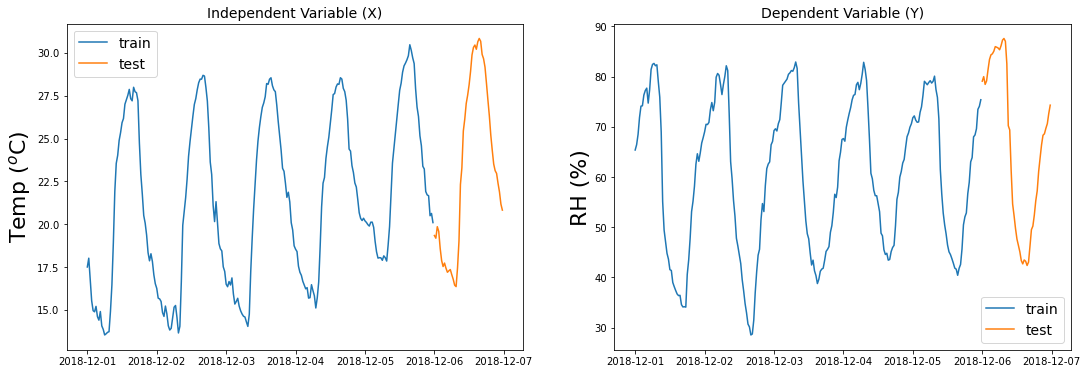

In [65]:
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
plt.plot(df.loc['2018-12-01':'2018-12-05']['AirTC_GMX_10m_Avg'],label='train')
plt.plot(df.loc['2018-12-06 00:00:00':'2018-12-06']['AirTC_GMX_10m_Avg'],label='test')
plt.ylabel('Temp ($^o$C)',fontsize=22)
plt.title('Independent Variable (X)',fontsize=14)
plt.legend(fontsize=14)

plt.subplot(1,2,2)
plt.plot(df.loc['2018-12-01':'2018-12-05']['RH_GMX_10m_Avg'],label='train')
plt.plot(df.loc['2018-12-06 00:00:00':'2018-12-06']['RH_GMX_10m_Avg'],label='test')
plt.ylabel('RH (%)',fontsize=22)
plt.title('Dependent Variable (Y)',fontsize=14)

plt.legend(fontsize=14)

### Train, Test splitting

In [66]:
x_train = df.loc['2018-12-01':'2018-12-05']['AirTC_GMX_10m_Avg']

y_train = df.loc['2018-12-01':'2018-12-05']['RH_GMX_10m_Avg']

In [67]:
x_test = df.loc['2018-12-06 00:00:00':'2018-12-06']['AirTC_GMX_10m_Avg']

y_test = df.loc['2018-12-06 00:00:00':'2018-12-06']['RH_GMX_10m_Avg']

##### Form a simple Multi Layer Perceptron using 'Keras'

In [68]:
#from keras.models import Sequential
#from keras.layers import Dense

##### ATTENTION: 

The first thing to get right is to ensure the input layer has the right number of input features. Here we have one feature ('10-m Air Temperature). Hence 

In [77]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

In [78]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [79]:
history = model.fit(x_train, y_train, epochs=350, batch_size=10)

Epoch 1/350
24/24 [==============================] - 0s 725us/step - loss: 2822.4184 - mse: 2822.4184
Epoch 2/350
24/24 [==============================] - 0s 693us/step - loss: 2690.3246 - mse: 2690.3246
Epoch 3/350
24/24 [==============================] - 0s 693us/step - loss: 2114.2309 - mse: 2114.2309
Epoch 4/350
24/24 [==============================] - 0s 652us/step - loss: 1905.9113 - mse: 1905.9113
Epoch 5/350
24/24 [==============================] - 0s 633us/step - loss: 1387.9516 - mse: 1387.9516
Epoch 6/350
24/24 [==============================] - 0s 695us/step - loss: 1224.5966 - mse: 1224.5966
Epoch 7/350
24/24 [==============================] - 0s 650us/step - loss: 904.5525 - mse: 904.5525
Epoch 8/350
24/24 [==============================] - 0s 629us/step - loss: 833.4407 - mse: 833.4407
Epoch 9/350
24/24 [==============================] - 0s 655us/step - loss: 827.0496 - mse: 827.0496
Epoch 10/350
24/24 [==============================] - 0s 685us/step - loss: 794.8168 - m

24/24 [==============================] - 0s 573us/step - loss: 652.4998 - mse: 652.4998
Epoch 83/350
24/24 [==============================] - 0s 673us/step - loss: 718.2707 - mse: 718.2707
Epoch 84/350
24/24 [==============================] - 0s 632us/step - loss: 684.4988 - mse: 684.4988
Epoch 85/350
24/24 [==============================] - 0s 682us/step - loss: 707.0323 - mse: 707.0323
Epoch 86/350
24/24 [==============================] - 0s 652us/step - loss: 675.5358 - mse: 675.5358
Epoch 87/350
24/24 [==============================] - 0s 605us/step - loss: 683.2995 - mse: 683.2995
Epoch 88/350
24/24 [==============================] - 0s 615us/step - loss: 686.5158 - mse: 686.5158
Epoch 89/350
24/24 [==============================] - 0s 590us/step - loss: 681.1387 - mse: 681.1387
Epoch 90/350
24/24 [==============================] - 0s 582us/step - loss: 710.1780 - mse: 710.1780
Epoch 91/350
24/24 [==============================] - 0s 625us/step - loss: 703.3781 - mse: 703.3781
Epo

24/24 [==============================] - 0s 691us/step - loss: 31.1197 - mse: 31.1197
Epoch 244/350
24/24 [==============================] - 0s 650us/step - loss: 34.9554 - mse: 34.9554
Epoch 245/350
24/24 [==============================] - 0s 702us/step - loss: 34.6842 - mse: 34.6842
Epoch 246/350
24/24 [==============================] - 0s 675us/step - loss: 35.0071 - mse: 35.0071
Epoch 247/350
24/24 [==============================] - 0s 582us/step - loss: 37.1101 - mse: 37.1101
Epoch 248/350
24/24 [==============================] - 0s 598us/step - loss: 35.1589 - mse: 35.1589
Epoch 249/350
24/24 [==============================] - 0s 625us/step - loss: 31.4816 - mse: 31.4816
Epoch 250/350
24/24 [==============================] - 0s 657us/step - loss: 32.6336 - mse: 32.6336
Epoch 251/350
24/24 [==============================] - 0s 619us/step - loss: 28.7526 - mse: 28.7526
Epoch 252/350
24/24 [==============================] - 0s 630us/step - loss: 34.7552 - mse: 34.7552
Epoch 253/350


24/24 [==============================] - 0s 656us/step - loss: 31.7527 - mse: 31.7527
Epoch 326/350
24/24 [==============================] - 0s 574us/step - loss: 32.8084 - mse: 32.8084
Epoch 327/350
24/24 [==============================] - 0s 660us/step - loss: 35.9544 - mse: 35.9544
Epoch 328/350
24/24 [==============================] - 0s 631us/step - loss: 35.2613 - mse: 35.2613
Epoch 329/350
24/24 [==============================] - 0s 558us/step - loss: 32.2926 - mse: 32.2926
Epoch 330/350
24/24 [==============================] - 0s 616us/step - loss: 35.1982 - mse: 35.1982
Epoch 331/350
24/24 [==============================] - 0s 594us/step - loss: 35.1896 - mse: 35.1896
Epoch 332/350
24/24 [==============================] - 0s 598us/step - loss: 34.0199 - mse: 34.0199
Epoch 333/350
24/24 [==============================] - 0s 608us/step - loss: 29.3480 - mse: 29.3480
Epoch 334/350
24/24 [==============================] - 0s 584us/step - loss: 33.3106 - mse: 33.3106
Epoch 335/350


[]

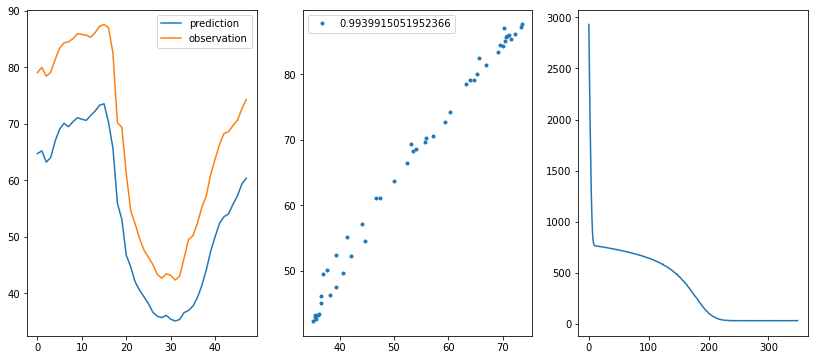

In [80]:
plt.figure(figsize=[14,6])
plt.subplot(1,3,1)
plt.plot(model.predict(x_test),label='prediction')
plt.plot(y_test.values,label='observation')
plt.legend()

plt.subplot(1,3,2)
plt.plot(model.predict(x_test),y_test.values,'.',label=str(np.corrcoef(model.predict(x_test)[:,0],y_test.values)[0,1]))
plt.legend()

plt.subplot(1,3,3)
loss = history.history['loss']
plt.plot(loss, label='Train Loss')
plt.plot()
#plt.ylim([30,40])

### Importance of Data Scaling

In [81]:
np.random.seed(42)

Lets Introduce a noise (radom number) into the dataset with in the order of Temperature

In [82]:
df['noise'] = np.random.randint(1,6,len(df))*100
df          = df[['AirTC_GMX_10m_Avg','noise','RH_GMX_10m_Avg']]
df.head(2)

,AirTC_GMX_10m_Avg,noise,RH_GMX_10m_Avg
TIMESTAMP,,,
2018-12-01 00:00:00,17.49744,400,65.37556
2018-12-01 00:30:00,18.01167,500,66.43833


In [83]:
x_train = df.loc['2018-12-01':'2018-12-05'][['AirTC_GMX_10m_Avg','noise']]
x_train = x_train.values
y_train = df.loc['2018-12-01':'2018-12-05']['RH_GMX_10m_Avg']

x_test = df.loc['2018-12-06 00:00:00':'2018-12-06'][['AirTC_GMX_10m_Avg','noise']]
x_test = x_test.values
y_test = df.loc['2018-12-06 00:00:00':'2018-12-06']['RH_GMX_10m_Avg']

In [84]:
###define the keras model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [85]:
history = model.fit(x_train, y_train, epochs=250, batch_size=10)

Epoch 1/250
24/24 [==============================] - 0s 627us/step - loss: 1717.0302 - mse: 1717.0301
Epoch 2/250
24/24 [==============================] - 0s 774us/step - loss: 1190.0163 - mse: 1190.0163
Epoch 3/250
24/24 [==============================] - 0s 711us/step - loss: 806.6299 - mse: 806.6299
Epoch 4/250
24/24 [==============================] - 0s 673us/step - loss: 876.2641 - mse: 876.2641
Epoch 5/250
24/24 [==============================] - 0s 649us/step - loss: 944.5313 - mse: 944.5313
Epoch 6/250
24/24 [==============================] - 0s 650us/step - loss: 816.3852 - mse: 816.3852
Epoch 7/250
24/24 [==============================] - 0s 655us/step - loss: 938.6193 - mse: 938.6193
Epoch 8/250
24/24 [==============================] - 0s 694us/step - loss: 865.3377 - mse: 865.3377
Epoch 9/250
24/24 [==============================] - 0s 734us/step - loss: 839.7391 - mse: 839.7391
Epoch 10/250
24/24 [==============================] - 0s 659us/step - loss: 813.6681 - mse: 813.

24/24 [==============================] - 0s 684us/step - loss: 546.1880 - mse: 546.1880
Epoch 163/250
24/24 [==============================] - 0s 712us/step - loss: 633.0893 - mse: 633.0893
Epoch 164/250
24/24 [==============================] - 0s 704us/step - loss: 579.0490 - mse: 579.0490
Epoch 165/250
24/24 [==============================] - 0s 702us/step - loss: 557.3569 - mse: 557.3569
Epoch 166/250
24/24 [==============================] - 0s 682us/step - loss: 578.3120 - mse: 578.3120
Epoch 167/250
24/24 [==============================] - 0s 650us/step - loss: 580.6695 - mse: 580.6695
Epoch 168/250
24/24 [==============================] - 0s 650us/step - loss: 570.5887 - mse: 570.5887
Epoch 169/250
24/24 [==============================] - 0s 645us/step - loss: 571.0102 - mse: 571.0102
Epoch 170/250
24/24 [==============================] - 0s 702us/step - loss: 587.0156 - mse: 587.0156
Epoch 171/250
24/24 [==============================] - 0s 738us/step - loss: 509.2679 - mse: 509

In [86]:
prediction = model.predict(x_test)

[]

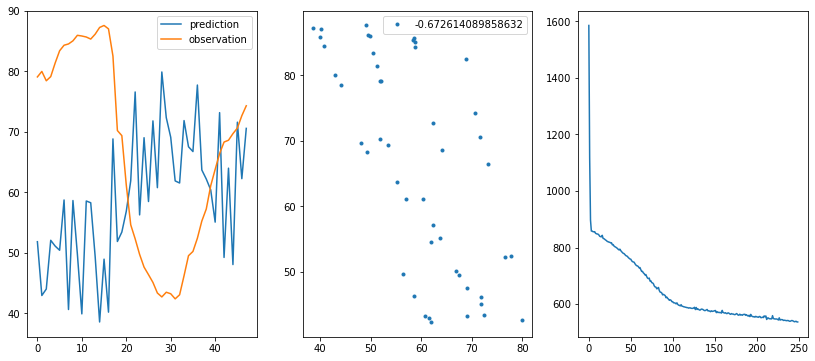

In [87]:
plt.figure(figsize=[14,6])
plt.subplot(1,3,1)
plt.plot(prediction,label='prediction')
plt.plot(y_test.values,label='observation')
plt.legend()

plt.subplot(1,3,2)
plt.plot(model.predict(x_test),y_test.values,'.',label=str(np.corrcoef(model.predict(x_test)[:,0],y_test.values)[0,1]))
plt.legend()

plt.subplot(1,3,3)
loss = history.history['loss']
plt.plot(loss, label='Train Loss')
plt.plot()

### Lets Introduce Min-Max Scaler

In [88]:
np.random.seed(42)

In [89]:
from sklearn.preprocessing import MinMaxScaler

sc1 = MinMaxScaler()
sc2 = MinMaxScaler()

sc1.fit(x_train)
sc2.fit(y_train.values[:,None])

x_train_ = sc1.transform(x_train)
x_test_  = sc1.transform(x_test)

y_train_ = sc2.transform(y_train.values[:,None])
y_test_  = sc2.transform(y_test.values[:,None])

x_train.max(),x_test.max(),y_train.max(),y_test.max()

x_train_.max(),x_test_.max(),y_train_.max(),y_test_.max()

(1.0, 1.0216154372209414, 0.9999999999999999, 1.086160032190933)

In [23]:
###define the keras model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [24]:
history = model.fit(x_train_, y_train_, epochs=250, batch_size=10)

Epoch 1/250
24/24 [==============================] - 0s 650us/step - loss: 0.0940 - mse: 0.0940
Epoch 2/250
24/24 [==============================] - 0s 595us/step - loss: 0.0953 - mse: 0.0953
Epoch 3/250
24/24 [==============================] - 0s 664us/step - loss: 0.0906 - mse: 0.0906
Epoch 4/250
24/24 [==============================] - 0s 627us/step - loss: 0.0843 - mse: 0.0843
Epoch 5/250
24/24 [==============================] - 0s 642us/step - loss: 0.0862 - mse: 0.0862
Epoch 6/250
24/24 [==============================] - 0s 674us/step - loss: 0.0783 - mse: 0.0783
Epoch 7/250
24/24 [==============================] - 0s 674us/step - loss: 0.0771 - mse: 0.0771
Epoch 8/250
24/24 [==============================] - 0s 691us/step - loss: 0.0688 - mse: 0.0688
Epoch 9/250
24/24 [==============================] - 0s 691us/step - loss: 0.0673 - mse: 0.0673
Epoch 10/250
24/24 [==============================] - 0s 659us/step - loss: 0.0634 - mse: 0.0634
Epoch 11/250
24/24 [===================

24/24 [==============================] - 0s 639us/step - loss: 0.0111 - mse: 0.0111
Epoch 169/250
24/24 [==============================] - 0s 698us/step - loss: 0.0106 - mse: 0.0106
Epoch 170/250
24/24 [==============================] - 0s 662us/step - loss: 0.0115 - mse: 0.0115
Epoch 171/250
24/24 [==============================] - 0s 691us/step - loss: 0.0106 - mse: 0.0106
Epoch 172/250
24/24 [==============================] - 0s 648us/step - loss: 0.0107 - mse: 0.0107
Epoch 173/250
24/24 [==============================] - 0s 679us/step - loss: 0.0103 - mse: 0.0103
Epoch 174/250
24/24 [==============================] - 0s 673us/step - loss: 0.0107 - mse: 0.0107
Epoch 175/250
24/24 [==============================] - 0s 578us/step - loss: 0.0104 - mse: 0.0104
Epoch 176/250
24/24 [==============================] - 0s 607us/step - loss: 0.0100 - mse: 0.0100
Epoch 177/250
24/24 [==============================] - 0s 620us/step - loss: 0.0096 - mse: 0.0096
Epoch 178/250
24/24 [=============

In [25]:
prediction = model.predict(x_test_)

[]

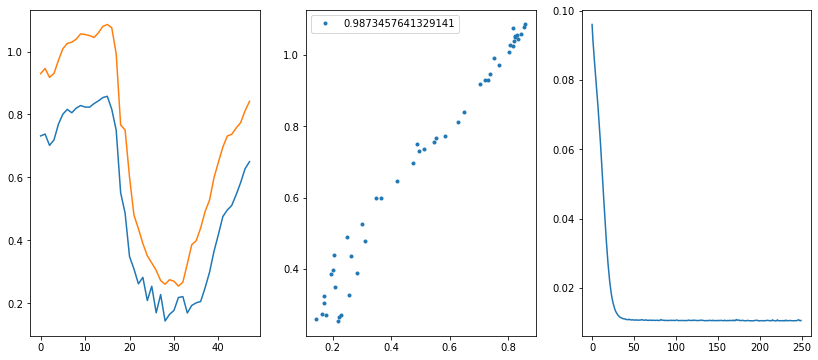

In [26]:
plt.figure(figsize=[14,6])
plt.subplot(1,3,1)
plt.plot(prediction)
plt.plot(y_test_)

plt.subplot(1,3,2)
plt.plot(model.predict(x_test_),y_test_,'.',label=str(np.corrcoef(prediction[:,0],y_test_[:,0])[0,1]))
plt.legend()

plt.subplot(1,3,3)
loss = history.history['loss']
plt.plot(loss, label='Train Loss')
plt.plot()

## Hyper Parameters

## Lets look back at our OLD probelm y = x$^2$+y$^2$ using keras

In [27]:
def compu(data):
    #return (data[:,0]*data[:,1])+((data[:,0]**2)*(data[:,1]**2))
    return (data[:,0]**2)*(data[:,1]**2)

## Hyper-parameter tuning

##############################################################################

################################################################################

### Train-data

In [28]:
size = 500
radn = np.random.randint(10,700,size=size)/1000
#radn = np.random.randint(10,20,size=size)/100


input_set = radn.reshape(250,2)
labels    = compu(input_set)

labels    = labels.reshape(labels.shape[0],1)
y         = labels.copy()

X = input_set.copy()
X = X
y = y[:,0]

### Test-data

In [91]:
# calculating hidden layer activations
size = 400
radn = np.random.randint(10,700,size=size)/1000
#radn = np.random.randint(10,20,size=size)/100


x_test = radn.reshape(200,2)
y_test = compu(x_test)

In [92]:
def chg_var_param(opt='adam',lr=0.005,activation='sigmoid',verbose=0,epoches=700):
    model = mod_cons(optimizer=opt,lr=lr,activation=activation)
    
    history = model.fit(X, y, verbose=verbose,epochs=epoches)
    
    prediction = model.predict(x_test)
    
    plt.figure(figsize=[14,4])

    plt.subplot(1,2,1)
    plt.plot(prediction,y_test,'+',label=str(np.corrcoef(prediction[:,0],y_test)[0,1]))
    plt.legend()

    plt.subplot(1,2,2)
    loss = history.history['loss']
    plt.plot(loss, label='Train Loss')
    plt.plot()

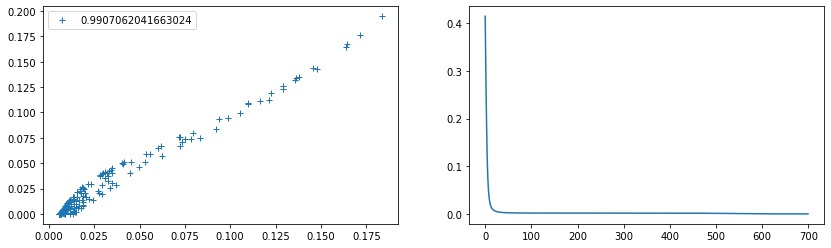

In [93]:
chg_var_param()

In [94]:
interact(chg_var_param,input_dim=2,activation=['sigmoid','relu'],
         opt=['adam','SGD'],
         lr=np.arange(0.005,0.055,0.005),epoches=[300,400,500,600,700])

interactive(children=(Dropdown(description='opt', options=('adam', 'SGD'), value='adam'), Dropdown(description…

<function __main__.chg_var_param(opt='adam', lr=0.005, activation='sigmoid', verbose=0, epoches=700)>

### Contd. to Presentation